## Import Libraries and Run Query

In [163]:
# series and dataframes
import numpy as np
import pandas as pd
# os 
import os
# graphing
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import os
from google_auth_oauthlib import flow
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [164]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/geoff.parent/Desktop/coding_repo/credentials/mightyhive-data-science-poc-460f36144a00.json"

In [165]:
%%bigquery df   
SELECT  * FROM mightyhive-data-science-poc.001_namer_ds.010_consumer_sample

Downloading: 100%|██████████| 225405/225405 [00:03<00:00, 61857.68rows/s]


In [239]:
df.head()

,CUSTNO,ZIP,ORDER_NO,PRODUCT_NO,PRODUCT_CATEGORY_ID,CHANNEL,OFFER_ID,ORDER_DATE,COST,REVENUE,PAY_METHOD,QUANTITY,RETN_REVENUE,YEAR,MONTH,MONTHYEAR
0,10066154044,22801,129920453,983040,P,ML,A08WNB,2008-01-18,49.99,99.95,PC,1,NaN,2008,1,2008-01
1,9999917113,97520,129895678,983296,T,ML,A06EHB,2006-12-09,84.00,159.90,PC,2,NaN,2006,12,2006-12
2,10040744514,78582,129888573,983296,T,ML,A06EHB,2006-09-27,42.00,79.95,PC,1,NaN,2006,9,2006-09
3,10061657050,11752,129899497,983296,T,ML,A06LCB,2007-03-06,42.00,79.95,PC,1,NaN,2007,3,2007-03
4,10076287792,80226,129950736,983296,T,ML,A09SPB,2009-02-24,42.00,39.95,MO,1,NaN,2009,2,2009-02


## Look at Time Series by Sum



In [240]:
###enhance dataframe with month and year
df_bydate = df.groupby(by='ORDER_DATE').sum()
df_bydate = df_bydate.reset_index()
df_bydate['ORDER_DATE'] = pd.to_datetime(df_bydate['ORDER_DATE'])
df_bydate['YEAR'] = df_bydate['ORDER_DATE'].dt.year
df_bydate['MONTH'] = df_bydate['ORDER_DATE'].dt.month
df_bydate['QUARTER'] = pd.PeriodIndex(df_bydate['ORDER_DATE'], freq='Q')
df_bydate.head()

,ORDER_DATE,CUSTNO,ORDER_NO,PRODUCT_NO,COST,REVENUE,QUANTITY,RETN_REVENUE,YEAR,MONTH,QUARTER
0,2005-01-01,70499163361,870074328,6836547,184.32,379.65,7,0.00,2005,1,2005Q1
1,2005-01-02,130893049032,1623027795,12715780,665.66,1429.35,13,339.90,2005,1,2005Q1
2,2005-01-03,251696487604,3130796194,24468757,607.27,1314.55,29,299.90,2005,1,2005Q1
3,2005-01-04,241488858976,3011526532,23449515,1253.13,2570.80,24,269.95,2005,1,2005Q1
4,2005-01-05,703740955527,8803843039,68201154,2359.62,5019.40,70,59.95,2005,1,2005Q1


In [241]:
### Revenue
##fig = make_subplots(rows=2, cols=1)

fig = px.line(df_bydate, x='ORDER_DATE', y='REVENUE',title="Sum of Revenue by Day", width=1200, height=300)
fig.show()

Month Trend Varaition by Year


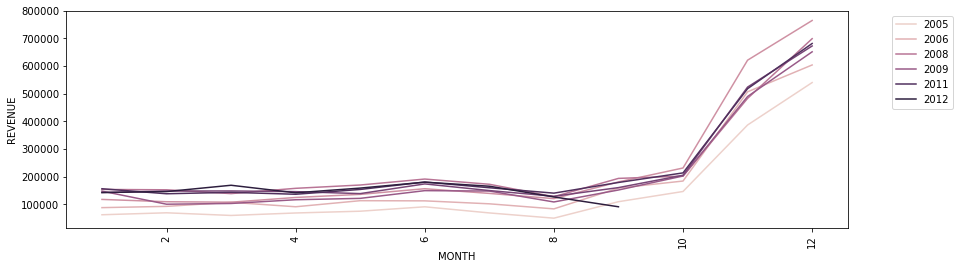

In [242]:
### monthly trend by year
df_bydate['MONTH'] = pd.DatetimeIndex(df_bydate['ORDER_DATE']).month
df_bydate['YEAR'] = pd.DatetimeIndex(df_bydate['ORDER_DATE']).year
df_monthyear = df_bydate.groupby(by=['MONTH','YEAR']).agg({'REVENUE':sum})
plt.figure(figsize=(14, 4))
sns.lineplot( x='MONTH', y='REVENUE', hue="YEAR",  data=df_monthyear)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
print('Month Trend Varaition by Year')
plt.show()

No handles with labels found to put in legend.


Month Trend Varaition by Year - CLEAN


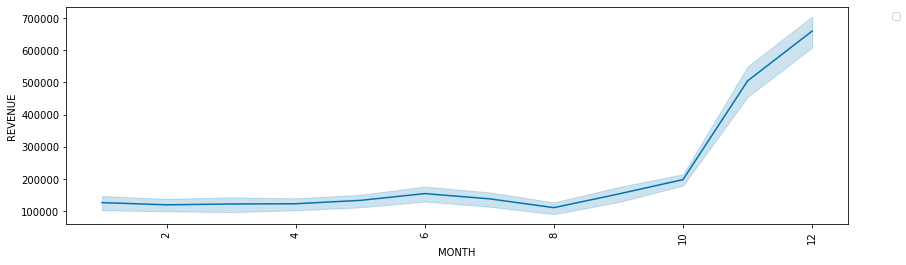

In [243]:
### same graph just cleaner
plt.figure(figsize=(14, 4))
sns.lineplot(x='MONTH', y='REVENUE', data=df_monthyear)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
print('Month Trend Varaition by Year - CLEAN')
plt.show()

In [244]:
### returns
fig = px.line(df_bydate, x='ORDER_DATE', y='RETN_REVENUE',title="Sum of Returns by Day", width=1200, height=300)
fig.show()

In [245]:
### cost
fig = px.line(df_bydate, x='ORDER_DATE', y='COST',title="Sum of Cost by Day", width=1200, height=300)
fig.show()

### Time Series by Notes
##### Revenue by month trends
- not only is q4 higher than other years it varies more between years as well.
##### Revenue Sum by day
- cyclical, mostly popping up during the holiday season
- outlier in 2010 Q1
- 2006 Q4 was best year
##### Returns Sum by day
- returns peak in Q4
- outlier in 2011 Q1
- randomness the rest of the year and also random by year as well
##### Costs Sum by day
- no cyclical costs involved
- outlier in jan 2009 & 2010 q1
- matches the revenue patterns

In [174]:
df_bydate.head()

,ORDER_DATE,CUSTNO,ORDER_NO,PRODUCT_NO,COST,REVENUE,QUANTITY,RETN_REVENUE,YEAR,MONTH,QUARTER
0,2005-01-01,70499163361,870074328,6836547,184.32,379.65,7,0.00,2005,1,2005Q1
1,2005-01-02,130893049032,1623027795,12715780,665.66,1429.35,13,339.90,2005,1,2005Q1
2,2005-01-03,251696487604,3130796194,24468757,607.27,1314.55,29,299.90,2005,1,2005Q1
3,2005-01-04,241488858976,3011526532,23449515,1253.13,2570.80,24,269.95,2005,1,2005Q1
4,2005-01-05,703740955527,8803843039,68201154,2359.62,5019.40,70,59.95,2005,1,2005Q1


## Category Groupings

In [175]:
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])
df['YEAR'] = df['ORDER_DATE'].dt.year
df['MONTH'] = df['ORDER_DATE'].dt.month
df['MONTHYEAR'] = df['ORDER_DATE'].dt.to_period('m')
df_groupchannels = df.groupby(['MONTHYEAR', 'CHANNEL','PRODUCT_CATEGORY_ID','OFFER_ID','PAY_METHOD']).agg({'QUANTITY':sum,'REVENUE': sum,'RETN_REVENUE':sum,'COST':sum}).reset_index()

In [176]:
df_groupchannels['PROFIT'] = df_groupchannels['REVENUE']-df_groupchannels['RETN_REVENUE']-df_groupchannels['COST']
df_groupchannels.head()

,MONTHYEAR,CHANNEL,PRODUCT_CATEGORY_ID,OFFER_ID,PAY_METHOD,QUANTITY,REVENUE,RETN_REVENUE,COST,PROFIT
0,2005-01,ML,B,A05WNB,PC,2,299.90,0.00,97.40,202.50
1,2005-01,ML,B,A05WNB,VI,1,129.95,0.00,58.25,71.70
2,2005-01,ML,C,A04GFB,PC,1,19.95,0.00,8.90,11.05
3,2005-01,ML,C,A05LWB,AX,2,539.90,469.95,235.00,-165.05
4,2005-01,ML,C,A05WNB,AX,1,64.95,0.00,24.50,40.45


In [177]:
categorystats = df_groupchannels.groupby(['PRODUCT_CATEGORY_ID']).agg({'QUANTITY':sum,'MONTHYEAR': [min, max],'REVENUE': sum,'RETN_REVENUE':sum,'COST':sum,'PROFIT':sum})
categorystats['profit_percent'] = categorystats[('PROFIT','sum')] / categorystats[('REVENUE','sum')]
categorystats['Returns_percent'] = categorystats[('RETN_REVENUE','sum')] / categorystats[('REVENUE','sum')]
categorystats.sort_values(by=[('REVENUE','sum')], ascending=False)

QUANTITY MONTHYEAR              REVENUE RETN_REVENUE  \
                         sum       min      max         sum          sum   
PRODUCT_CATEGORY_ID                                                        
E                      32344   2005-01  2012-09  3205446.30    215616.07   
P                      33602   2005-01  2012-09  2530905.85    155045.32   
T                      35203   2005-01  2012-09  2374709.94     76529.06   
C                      34717   2005-01  2012-09  2328616.46    207384.65   
H                      19860   2005-01  2012-09  2149258.53    167899.06   
F                      20145   2005-01  2012-09  1603039.15     68877.30   
B                      13997   2005-01  2012-09  1109597.79     66132.00   
X                       8886   2005-01  2012-09   927704.79     63559.52   
K                      10342   2005-01  2012-09   696100.05     30619.64   
L                       7024   2005-01  2012-09   642358.51     37987.50   
A                       7415   2005-01  2012-09   480677.45     29158.45   
O                       2325   2005-01  2012-09   345987.44     26034.54   
S                       4291   2005-01  2012-09   253329.16      4843.45   
J                       1852   2005-02  2012-09   112955.40      7102.25   
M                        732   2006-03  2012-09    89928.50      5072.80   
D                        714   2005-01  2012-09    79901.35      1469.40   
G                        237   2005-01  2012-08    34108.15      2304.35   
I                         14   2005-02  2012-09    18141.35         0.00   

                           COST      PROFIT profit_percent Returns_percent  
                            sum         sum                                 
PRODUCT_CATEGORY_ID                                                         
E                    1709048.64  1280781.59       0.399564        0.067266  
P                    1154699.32  1221161.21       0.482500        0.061261  
T                    1175792.93  1122387.95       0.472642        0.032227  
C                     967383.12  1153848.69       0.495508        0.089059  
H                    1035504.34   945855.13       0.440084        0.078120  
F                     702299.22   831862.63       0.518928        0.042967  
B                     453034.75   590431.04       0.532113        0.059600  
X                     375097.16   489048.11       0.527159        0.068513  
K                     353253.64   312226.77       0.448537        0.043987  
L                     237537.38   366833.63       0.571073        0.059138  
A                     203145.04   248373.96       0.516716        0.060661  
O                     171654.56   148298.34       0.428623        0.075247  
S                     113959.15   134526.56       0.531035        0.019119  
J                      46708.14    59145.01       0.523614        0.062877  
M                      39849.67    45006.03       0.500465        0.056409  
D                      34228.81    44203.14       0.553221        0.018390  
G                      17721.62    14082.18       0.412868        0.067560  
I                      11851.00     6290.35       0.346741        0.000000

In [178]:
channelstats = df_groupchannels.groupby(['CHANNEL']).agg({'QUANTITY':sum,'MONTHYEAR': [min, max],'REVENUE': sum,'RETN_REVENUE':sum,'COST':sum,'PROFIT':sum})
channelstats['profit_percent'] = channelstats[('PROFIT','sum')] / channelstats[('REVENUE','sum')]
channelstats['returns_percent'] = channelstats[('RETN_REVENUE','sum')] / channelstats[('REVENUE','sum')]
channelstats.sort_values(by=[('REVENUE','sum')], ascending=False)

QUANTITY MONTHYEAR                REVENUE RETN_REVENUE        COST  \
             sum       min      max           sum          sum         sum   
CHANNEL                                                                      
WE        126646   2005-01  2012-09  1.023357e+07    598208.16  4799371.36   
PH         98400   2005-01  2012-09  8.072792e+06    535164.35  3699200.80   
ML          8654   2005-01  2012-09  6.764019e+05     32262.85   304196.33   

             PROFIT profit_percent returns_percent  
                sum                                 
CHANNEL                                             
WE       4835992.32       0.472562        0.058455  
PH       3838427.24       0.475477        0.066292  
ML        339942.76       0.502575        0.047698

In [179]:
paymentstats = df_groupchannels.groupby(['PAY_METHOD']).agg({'QUANTITY':sum,'MONTHYEAR': [min, max],'REVENUE': sum,'RETN_REVENUE':sum,'COST':sum,'PROFIT':sum})
paymentstats['profit_percent'] = paymentstats[('PROFIT','sum')] / paymentstats[('REVENUE','sum')]
paymentstats['returns_percent'] = paymentstats[('RETN_REVENUE','sum')] / paymentstats[('REVENUE','sum')]
paymentstats.sort_values(by=[('REVENUE','sum')], ascending=False)

QUANTITY MONTHYEAR                REVENUE RETN_REVENUE        COST  \
                sum       min      max           sum          sum         sum   
PAY_METHOD                                                                      
VI           105340   2005-01  2012-09  8.368961e+06    522246.28  3858369.30   
MC            60645   2005-01  2012-09  4.855719e+06    305019.49  2250638.96   
AX            43575   2005-01  2012-09  3.751902e+06    222658.98  1755735.94   
DI            12086   2005-01  2012-09  9.675459e+05     69893.25   447490.63   
PC             7173   2005-01  2012-09  5.481573e+05     25357.75   245989.11   
PY             2465   2011-10  2012-09  1.923549e+05      9435.60    88509.01   
OA              748   2005-01  2012-09  1.108561e+05      5163.30    60102.82   
PX              556   2005-01  2012-09  7.088636e+04      1356.26    34648.36   
AZ              518   2011-04  2012-09  6.176610e+04         0.00    35561.58   
MO              413   2005-03  2012-09  3.524045e+04      3439.75    16219.67   
BM              110   2011-10  2012-09  1.262650e+04       879.80     6299.03   
MX               35   2005-03  2011-08  3.792300e+03       119.95     1699.10   
DC               25   2005-01  2008-11  1.844750e+03        64.95      989.93   
XX                5   2005-12  2007-08  5.647500e+02         0.00      284.56   
CA                3   2008-06  2011-04  4.198500e+02         0.00      182.25   
CC                3   2008-07  2008-07  1.298500e+02         0.00       48.24   

                PROFIT profit_percent returns_percent  
                   sum                                 
PAY_METHOD                                             
VI          3988345.02       0.476564        0.062403  
MC          2300060.40       0.473681        0.062817  
AX          1773506.74       0.472695        0.059346  
DI           450162.07       0.465262        0.072238  
PC           276810.42       0.504984        0.046260  
PY            94410.24       0.490813        0.049053  
OA            45589.95       0.411254        0.046577  
PX            34881.74       0.492080        0.019133  
AZ            26204.52       0.424254        0.000000  
MO            15581.03       0.442135        0.097608  
BM             5447.67       0.431447        0.069679  
MX             1973.25       0.520331        0.031630  
DC              789.87       0.428172        0.035208  
XX              280.19       0.496131        0.000000  
CA              237.60       0.565916        0.000000  
CC               81.61       0.628494        0.000000

### Category Notes
##### product_category
- all categories except for j,m,i have a max and min equal to the dataset
- revenue and profitability do not always match up; some categories are ranked higher in revenue but lower in profitability
- assuming cost is an attribute of a product and is therefore an attribute of PRODUCT_CATEGORY it is important to note that different categories have different profit percentages 

## Customer analysis

In [28]:
cust_df = df.groupby(df['CUSTNO']).agg({'QUANTITY':sum,'MONTHYEAR': [min, max],'REVENUE': sum, 'ORDER_NO':pd.Series.nunique})
cust_df = cust_df.reset_index()
cust_df.head()

CUSTNO QUANTITY MONTHYEAR          REVENUE ORDER_NO
                   sum       min      max     sum  nunique
0  9991187507        1   2007-10  2007-10   99.95        1
1  9991195310        2   2005-11  2007-12  119.90        2
2  9991202430        6   2009-11  2012-04  402.70        2
3  9991204402        2   2009-06  2009-06  147.90        1
4  9991215425        3   2005-11  2006-05  274.85        3

In [29]:
cust_df[('ORDER_NO','nunique')].mean()

1.374162669844099

<AxesSubplot:>

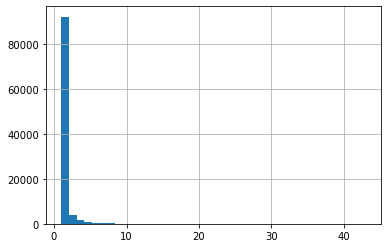

In [30]:
cust_df[('ORDER_NO','nunique')].hist(bins=40)

array([[<AxesSubplot:title={'center':'nunique'}>]], dtype=object)

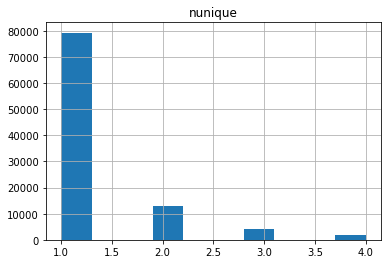

In [34]:
cust_df[cust_df[('ORDER_NO','nunique')] < 5]['ORDER_NO'].hist(bins =10)